In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)

In [2]:
df = pd.read_csv('/home/arnold/codebasics_real_life_proj/data/Bengaluru_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

data cleaning phase

In [5]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


dropping useless column.. in this case availability is useless, then society,balcony... we assume these columns are not important for our project

In [6]:
df2 = df.drop(['area_type','society','balcony','availability'], axis='columns')

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#checking of the null values
df3 = df2.dropna()

In [9]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

let's check the size variable which contains some of crazy values

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#let's create a new column named bhk

df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

/tmp/ipykernel_7863/35024221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [13]:
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


the above command seems to show errors in square feet columns since you cannot have 43 bedrooms in a 2400 square foot hence we need to tacle the square feet area

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

in the above command we see some kind of range values i.e '1133 -1384' this situation has obliged us to create a function checking the float value in a our variable i.e total sqft

In [17]:
def is_float(x):
    try :
        float(x)
    except :
        return False
    return True
    

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

#this command will show all the values which are not flaot

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


for the result above, we are going to convert those range values into a float or integer by considering their mean or median. the values such as 34.46 sq.meter or 412 perch will be ignored.

In [19]:
#function takibg a range as input and returning an average as output

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2 :
        return(float(tokens[0])+float(tokens[1]))/2
    try :
        return float(x)
    except :
        return None

In [20]:
#let's test the function

convert_sqft_to_num('2100')

2100.0

In [21]:
convert_sqft_to_num('3067-8156')

5611.5

let's apply the function convert_to_num()

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [23]:
df4.loc[122] #index 122 or location 122

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

2. feature engineering

In [24]:
#let's create a new feature which will allow us to better detect the outliers

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
#let's find the number of locations we have in our dataframe
len(df5.location.unique())

1304

In [26]:
#let's figure out how many data points are available per location

df5.location = df5.location.apply(lambda x: x.strip() )# to strip or remove the space in the location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
#let's see how many locations have less than 10 data points

len(location_stats[location_stats<=10])

1052

In [28]:
#now we  create a new category where we'll consider qll the  locations with less than 10 data point as other
len(df5.location.unique())

1293

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
#now we  create a new category where we'll consider qll the  locations with less than 10 data point as other
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

len(df5.location.unique())

242

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


the feature engineering done above has taken us from more than 1000 locations to 242 locations which is very nice for one hot encoding

3. outlier detection and removal
there are various ways of detecting outliers
* std deviation
* domain knowledge by talking to ther business manager for example
* z score
* percentile etc

for example here in real estate 300 sqft  per bhk is the standard


In [32]:
#example
1020/300

3.4

In [33]:
#outlier by doamin knowledge

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df5.shape

(13246, 7)

In [35]:
#let's remove those outliers

df6 = df5[~(df5.total_sqft/df5.bhk<300)]

df6.shape

(12502, 7)

In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

the code above has given us the statics of price per sqft, in our data frame anything above the maximum value i.e 176470 will be considered as an outlier

we are now writing a function removing outliers based on price per location

In [37]:
def remove_pps_outliers(df):

    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #m for mean
        st = np.std(subdf.price_per_sqft)#st for standard
        #st = np.std(subdf.price_per_sqft>(m-st)) 
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]

        df_out = pd.concat([df_out,reduced_df],ignore_index=True)

    return df_out


In [38]:
df7 = remove_pps_outliers(df6)

df7.shape

(10241, 7)

in our data set there again outliers, for example, in the same area, 2bhk are having prices more than 3 bhk, this cannot be possible in real life. there were maybe errors in data entry. to detect these outliers we will design a function drawing a scatter plot to show the outliers

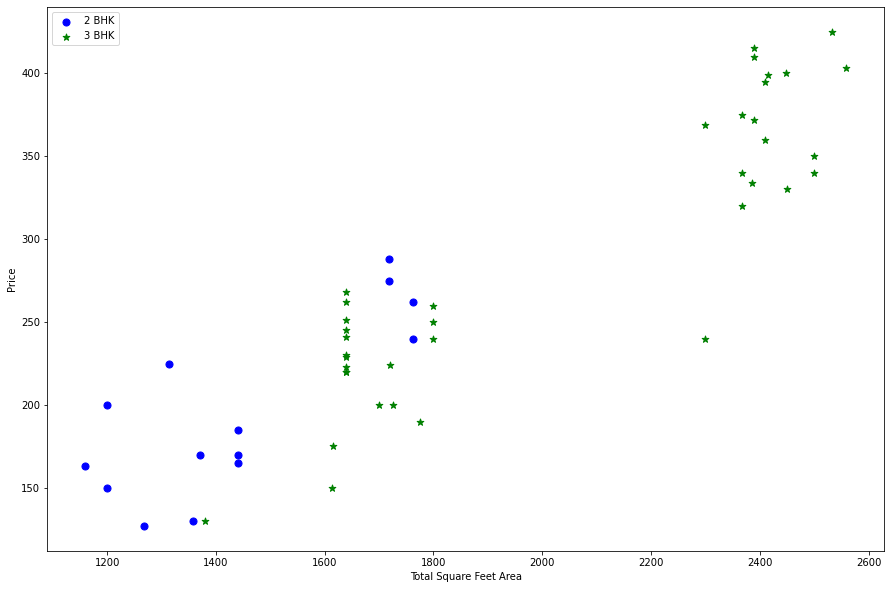

In [39]:
def plot_scatter_char(df, location):
    bhk2 = df[(df.location ==location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)

    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green',marker='*',label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()



plot_scatter_char(df7,'Rajaji Nagar')

from the graph above, we have some 2bhk for the same square feet as 3 bhk which appear to have higher price. for this reason we consider them as outliers and we have to remove them

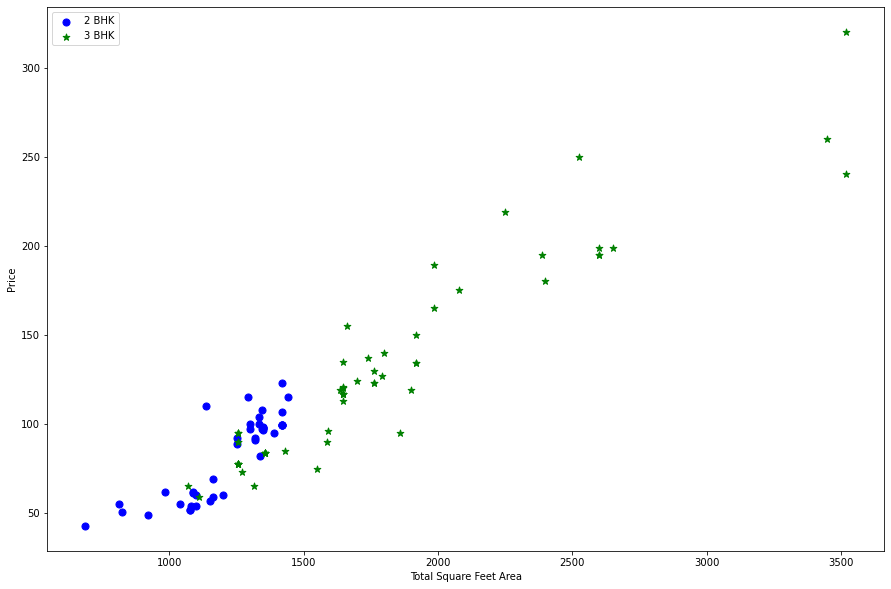

In [40]:
plot_scatter_char(df7,'Hebbal')

same observation as in the previous graph

we create a function with two for loops : the first fopr loop will group appartment per area and calculate their mean and standard deviation  and the second will be removing those 2 bhk whose mean will be lesser than the 1 bhk's mean

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]



            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')   


  

In [42]:
df8 =  remove_bhk_outliers(df7)
df8.shape

(7329, 7)

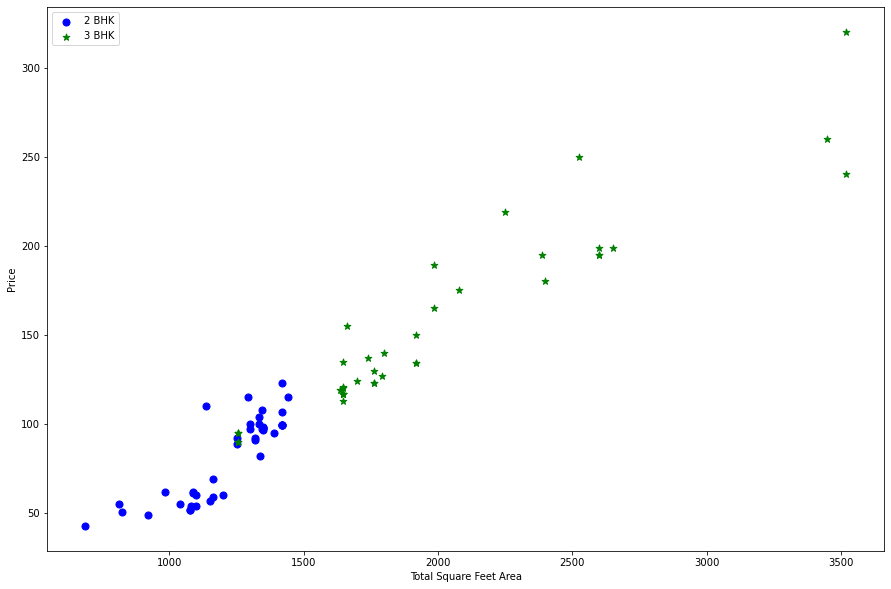

In [43]:
plot_scatter_char(df8,'Hebbal')

now that the outlier removal part is done, i want to plot the histogram to see how many appartment i have per sq.feet area

Text(0, 0.5, 'count')

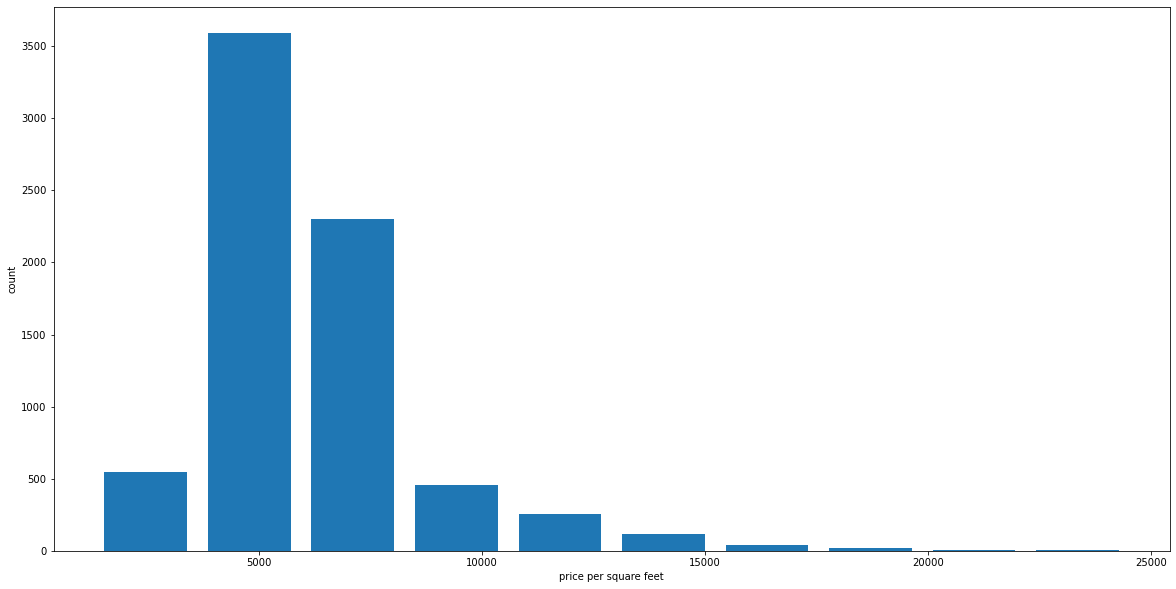

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

let's now check the bathroom variable to see if we can encouter any outlier..if we have a property with the number of bathrooms grater than the number of bedrooms plus two, that's an outlier.

Text(0, 0.5, 'count')

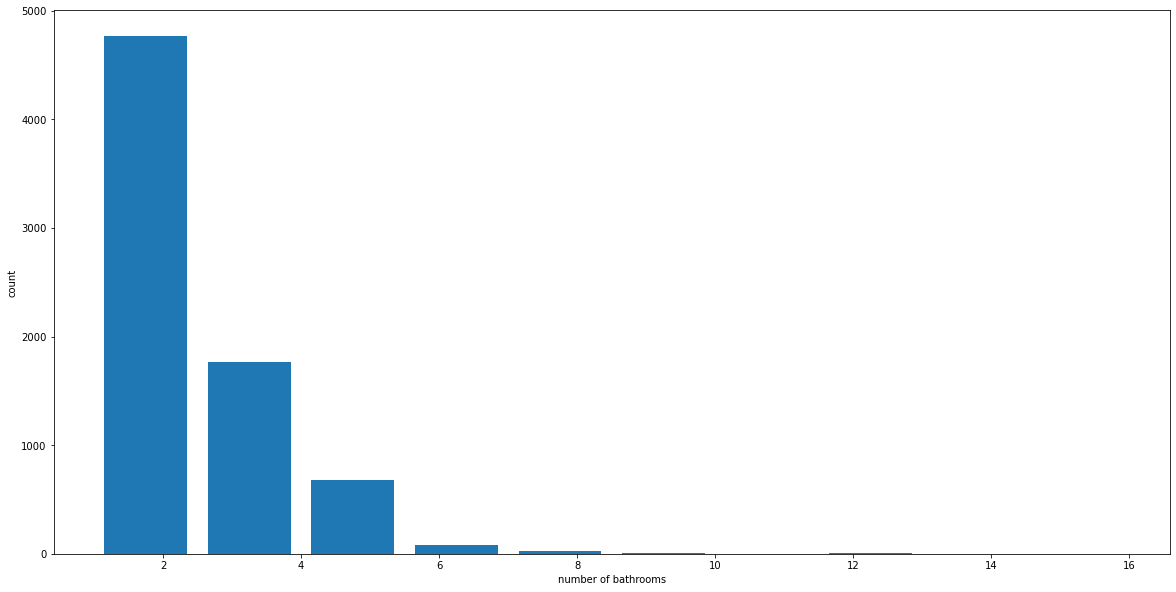

In [45]:
#let's plot an histogram for bathroom

plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')


In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df8.shape

(7329, 7)

In [48]:
#let's remove the outliers

df9 = df8[df8.bath<df8.bhk+2]

df9.shape

(7251, 7)

now that we are sure we have removed all the outliers we can drop unnecessary features such as size and price_per_sqft

In [49]:
df10 = df9.drop(['size','price_per_sqft'], axis='columns')

df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


modeling part... we'll use cross validation and gridsearch to come up with best algorithme

given that our dataframe has some categorical data and machine learning cannot undersatnd nominal data hence we have to convert these non numerical data to numerical ones using one hot encoding or pandas get dummies

In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#let's concatenate

df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')

In [52]:
df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11.drop(columns='location', axis=1,inplace=True)

In [54]:
df12 = df11

In [55]:
df12.shape

(7251, 245)

let's split the dataframe

In [56]:
X = df12.drop('price', axis='columns')

X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df12.price

y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874312

we have gotten 84% but the goal is to improve the result hence we gonna use k-fold classification model in order to improve the model

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv =  ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

still we hava not got the best score, hence we'll try other regression techniques such as lasso,ridge. for this, we'll use GridSearchCv class

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {

        'linear_regression' : {
           'model' : LinearRegression(),
           'params' : {
               'normalize':[True,False]
           }
            
            },

        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },


    'decision tree': {

        'model' : DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mise','friedman_mse'],
            'splitter': ['best','random']
        }
    }

        
        
        
            }

    scores = []

    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs =GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({

            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [62]:
find_best_model_using_gridsearchcv(X,y)

/home/arnold/anaconda3/envs/flask/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/arnold/anaconda3/envs/flask/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arnold/anaconda3/envs/flask/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/arnold/anaconda3/envs/flask/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'mise'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/arnold/anaconda3/envs/flask/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed.

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687446,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.708583,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


from the above command we see that linear_regression in this case is the best

In [63]:
#let's write the predict price function

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.49904677179228

In [65]:
predict_price('1st Phase JP Nagar',1000,3,3)

86.80519395205839

In [66]:
predict_price('Indira Nagar',1000,2,2)

181.27815484006842

now we have to import our model to a pickle file and import it to the web site

In [67]:
import pickle

with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


it is important to dump all the column informations into a json file

In [68]:
import json

columns = {

    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

now that the modeling is done, let's build our flask system